In [ ]:
# Importing required Libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading Dataset...
df = pd.read_csv(r"C:\Users\abhii\OneDrive\Desktop\Titanic_Survivals_Pred\data\titanic.csv")

### Exploring the Dataset to understand...

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Values Analysis...

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Percentage of missing values...
(df.isnull().sum() / len(df) * 100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Visual Missing Values Map...

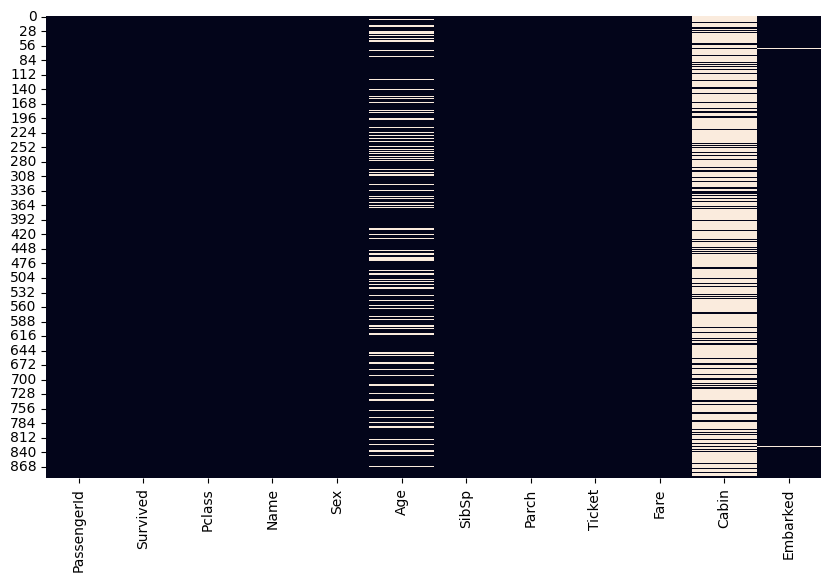

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### Data Cleaning...

In [ ]:
# We'll drop the Cabin feature because it has 77% missing values...
df = df.drop(columns=("Cabin"))

In [ ]:
# The Age feature has almost 20% of missing values. But we can't drop this Age Feature because it is a very importnant
# feature for our model.
# So we'll fill it with avg age of passengers.

df["Age"] = df["Age"].fillna(df["Age"].median())

In [21]:
# The Embarked Feature has very small missing values about 0.22%.
# We can fill it with most frequent value...
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### EDA (Insights Phase...)

### TARGET DISTRIBUTION...



In [24]:
# SURVIVAL DISTRIBUTION...
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [25]:
df["Survived"].value_counts(normalize=True) * 100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

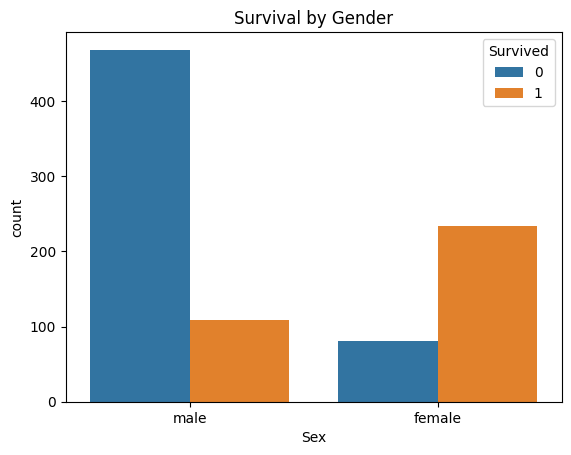

In [26]:
# SURVIVAL BY GENDER...
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival by Gender")
plt.show()

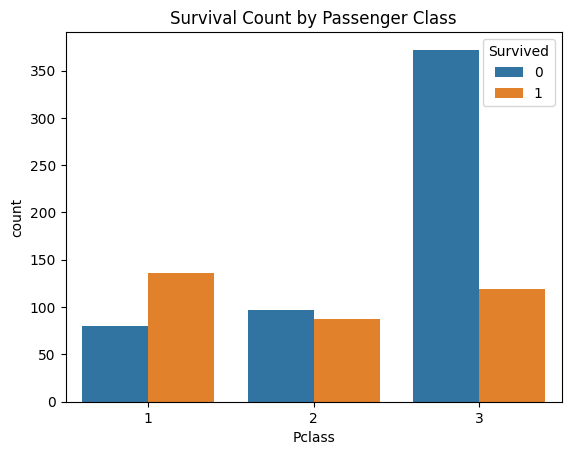

In [27]:
# Survival by Passenger Class...
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival Count by Passenger Class")
plt.show()

### AGE DISTRIBUTION...

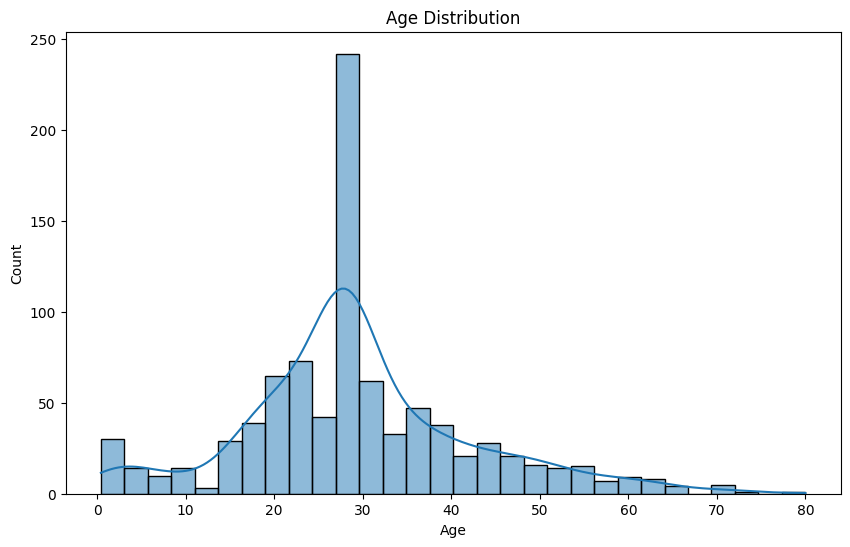

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

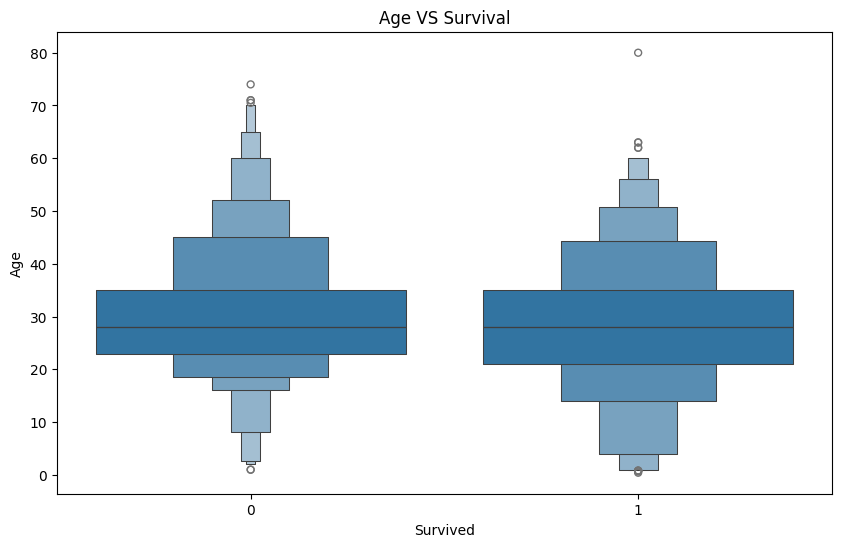

In [29]:
# Survival by Age...
plt.figure(figsize=(10,6))
sns.boxenplot(data=df, x="Survived", y="Age")
plt.title("Age VS Survival")
plt.show()

In [30]:
df.groupby("Survived")["Age"].mean()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

### Survival Rate (Percentage)...

In [31]:
# Survival Rate by Gender(Percentage)...
df.groupby("Sex")["Survived"].mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [32]:
# Survival Rate by Class (Percentage)...
df.groupby("Pclass")["Survived"].mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

### Fare vs Survival

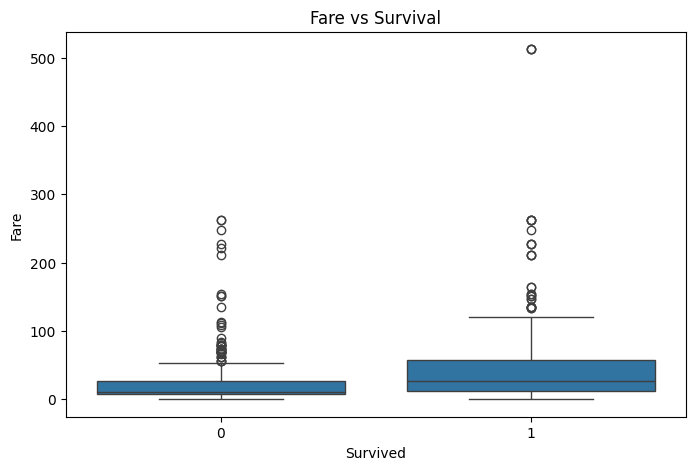

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare vs Survival")
plt.show()

### Feature Engineering + Preprocessing

In [38]:
# Creating a new feature FamilySize...
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [41]:
# Creating a new Feature IsAlone...
df["IsAlone"] = 1
df.loc[df["FamilySize"] > 1, "IsAlone"] = 0

In [47]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone'],
      dtype='str')

In [44]:
# Dropping Weak columns...
df = df.drop(columns=["Name","PassengerId","Ticket"])

In [45]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    str    
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    str    
 8   FamilySize  891 non-null    int64  
 9   IsAlone     891 non-null    int64  
dtypes: float64(2), int64(6), str(2)
memory usage: 69.7 KB


### Encoding categorical Values...

In [52]:
df = pd.get_dummies(df, drop_first=True).astype(int)

In [53]:
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,2,0,1,0,1
1,1,1,38,1,0,71,2,0,0,0,0
2,1,3,26,0,0,7,1,1,0,0,1
3,1,1,35,1,0,53,2,0,0,0,1
4,0,3,35,0,0,8,1,1,1,0,1


# MODELING PHASE

In [54]:
# Defining X and y
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [55]:
X.head(5)

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,3,22,1,0,7,2,0,1,0,1
1,1,38,1,0,71,2,0,0,0,0
2,3,26,0,0,7,1,1,0,0,1
3,1,35,1,0,53,2,0,0,0,1
4,3,35,0,0,8,1,1,1,0,1


In [56]:
# Train Test Split...
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training with LogisticRegression...

In [58]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression(max_iter=1000)

In [61]:
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### Making predictions

In [62]:
y_pred = model.predict(X_test)

### Accuracy Checking...

In [63]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8044692737430168

### Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

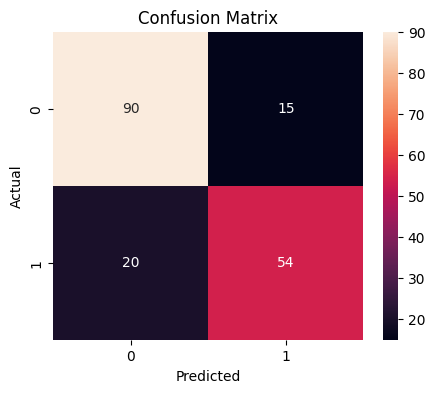

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [68]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))


In [69]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

importance.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
4,Fare,0.002292
3,Parch,-0.017029
1,Age,-0.029894
8,Embarked_Q,-0.049833
2,SibSp,-0.225338
5,FamilySize,-0.236779
9,Embarked_S,-0.335973
6,IsAlone,-0.664386
0,Pclass,-0.889984
7,Sex_male,-2.535309
